# Commodity Futures Analysis & Forecasting 

In this notebook, we will discover and explore data from the Commodities, particularly some futures data (Oil, Natural Gas, Gold, Copper and Cotton). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a statsmodel & ARCH method!

We'll be following the topics below along the way:

    1.) Price Analysis
    2.) Calculating Moving averages 
    3.) Daily return of the futures contracts on average
    4.) Correlation analysis
    5.) Value at risk
    6.) Forecasting S&P-GSCI Commodity Index Future using statsmodel & ARCH

***   


# 1. PRICE ANALYSIS

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# The tech stocks we'll use for this analysis
tech_list = ['CL=F', 'NG=F', 'GC=F', 'HG=F', 'CT=F']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data for each stock in tech_list and store in separate variables
CL_F = yf.download('CL=F', start, end)
NG_F = yf.download('NG=F', start, end)
GC_F = yf.download('GC=F', start, end)
HG_F = yf.download('HG=F', start, end)
CT_F = yf.download('CT=F', start, end)

# Create a list of downloaded data for each stock
company_list = [CL_F, NG_F, GC_F, HG_F, CT_F]
# Create a list of company names corresponding to the downloaded data
company_name = ["CRUDEOIL", "NATURALGAS", "GOLD", "COPPER", "COTTON"]

# Assign the company name as a column in each data frame in company_list
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Concatenate all the data frames in company_list into a single data frame
df = pd.concat(company_list, axis=0)

# Display the last 1 rows of the concatenated data frame
print(df.tail(1))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                            Open       High        Low      Close  Adj Close  \
Date                                                                           
2023-04-12 00:00:00-04:00  82.82  82.959999  82.529999  82.639999  82.639999   

                           Volume company_name  
Date                                            
2023-04-12 00:00:00-04:00     180       COTTON  


In [2]:
CRUDEOIL = CL_F.describe()
print(CRUDEOIL)

             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean    89.275336   91.063953   87.231107   89.181344   89.181344   
std     13.536260   13.851304   13.093290   13.572343   13.572343   
min     66.620003   67.699997   64.120003   66.739998   66.739998   
25%     78.540001   79.900002   77.029999   78.470001   78.470001   
50%     86.269997   88.419998   84.699997   86.470001   86.470001   
75%     98.639999  102.139999   95.849998   98.620003   98.620003   
max    122.430000  123.680000  120.790001  122.110001  122.110001   

              Volume  
count     253.000000  
mean   293476.731225  
std     94099.396690  
min         0.000000  
25%    261878.000000  
50%    305188.000000  
75%    346362.000000  
max    594215.000000  


In [3]:
NATURALGAS = NG_F.describe()
print(NATURALGAS)

             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean     6.002925    6.221435    5.752917    5.969289    5.969289   
std      2.290188    2.375451    2.213720    2.300615    2.300615   
min      2.019000    2.083000    1.944000    1.991000    1.991000   
25%      3.694000    3.839000    3.521000    3.671000    3.671000   
50%      6.598000    6.837000    6.337000    6.534000    6.534000   
75%      7.815000    8.169000    7.560000    7.820000    7.820000   
max      9.817000   10.028000    9.200000    9.680000    9.680000   

              Volume  
count     253.000000  
mean   116825.308300  
std     48842.682861  
min         0.000000  
25%     89444.000000  
50%    111811.000000  
75%    138819.000000  
max    273717.000000  


In [4]:
# General info
CRUDEOIL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8 non-null      float64
 1   High       8 non-null      float64
 2   Low        8 non-null      float64
 3   Close      8 non-null      float64
 4   Adj Close  8 non-null      float64
 5   Volume     8 non-null      float64
dtypes: float64(6)
memory usage: 448.0+ bytes


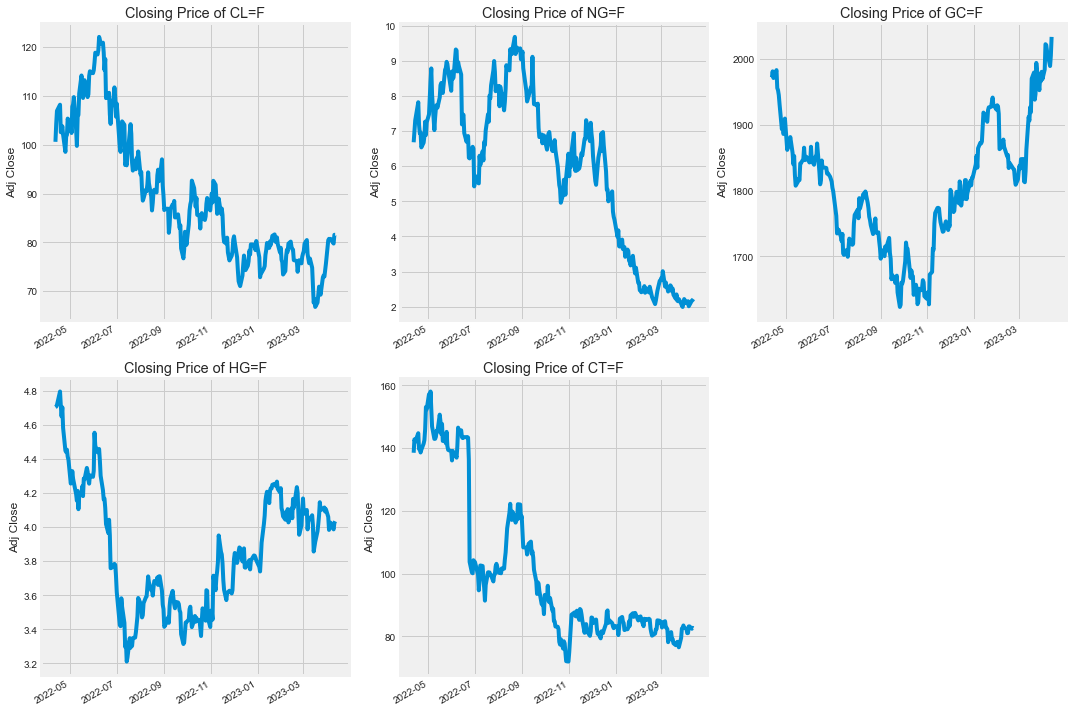

In [5]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

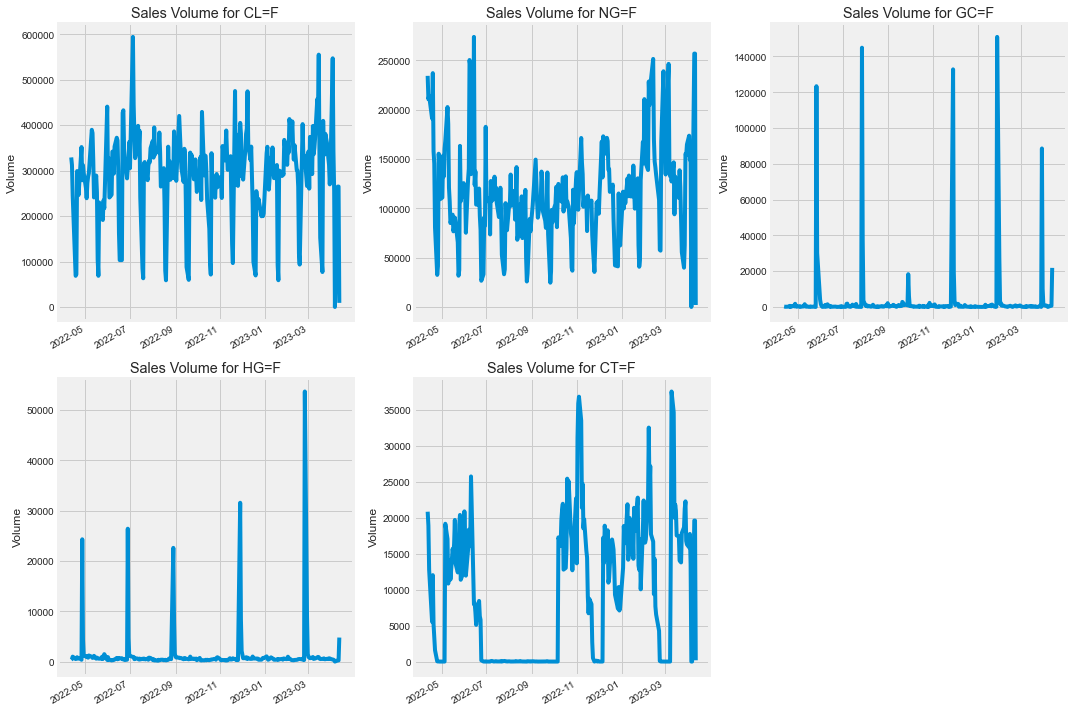

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the scripts.

# 2. CALCULATING MOVING AVERGAES

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

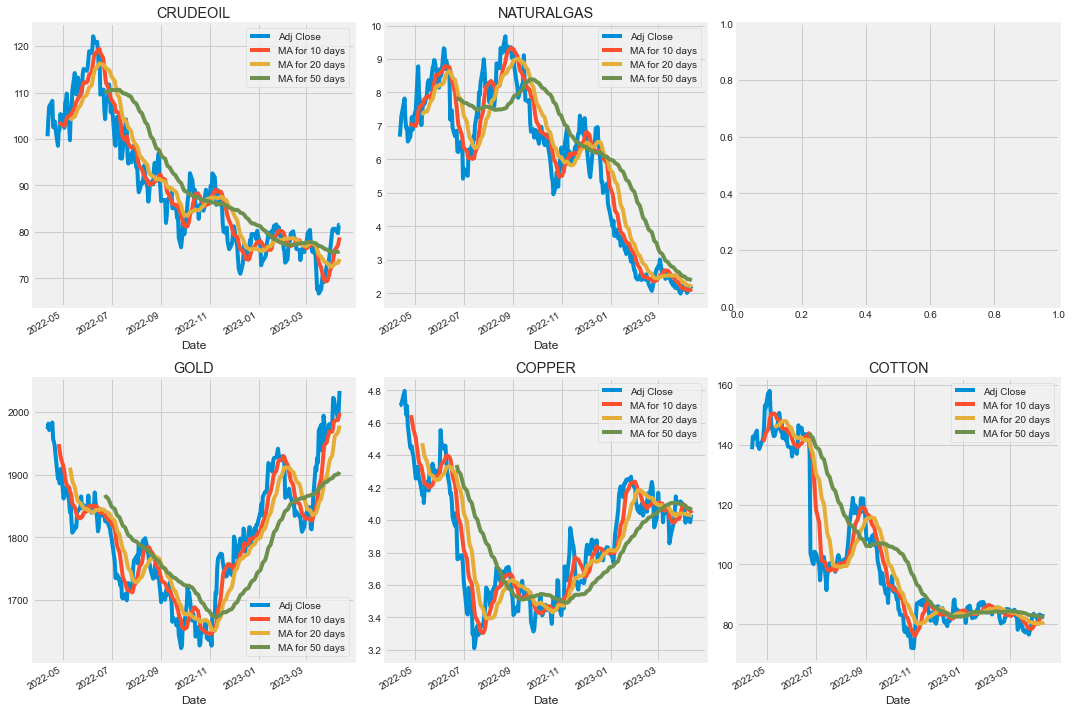

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

CL_F[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('CRUDEOIL')

NG_F[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('NATURALGAS')

GC_F[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('GOLD')

HG_F[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('COPPER')

CT_F[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_title('COTTON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. DAILY RETURNS

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the scripts. In order to do so we'll need to take a closer look at the daily changes, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns.

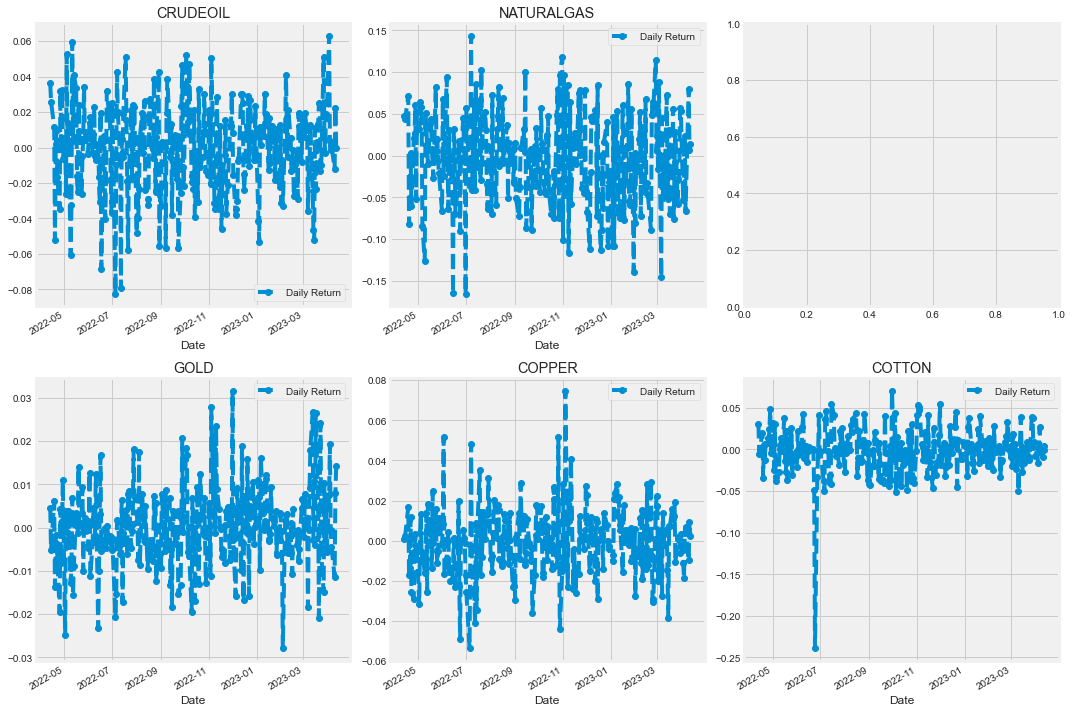

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

CL_F['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('CRUDEOIL')

NG_F['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('NATURALGAS')

GC_F['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('GOLD')

HG_F['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('COPPER')

CT_F['Daily Return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title('COTTON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

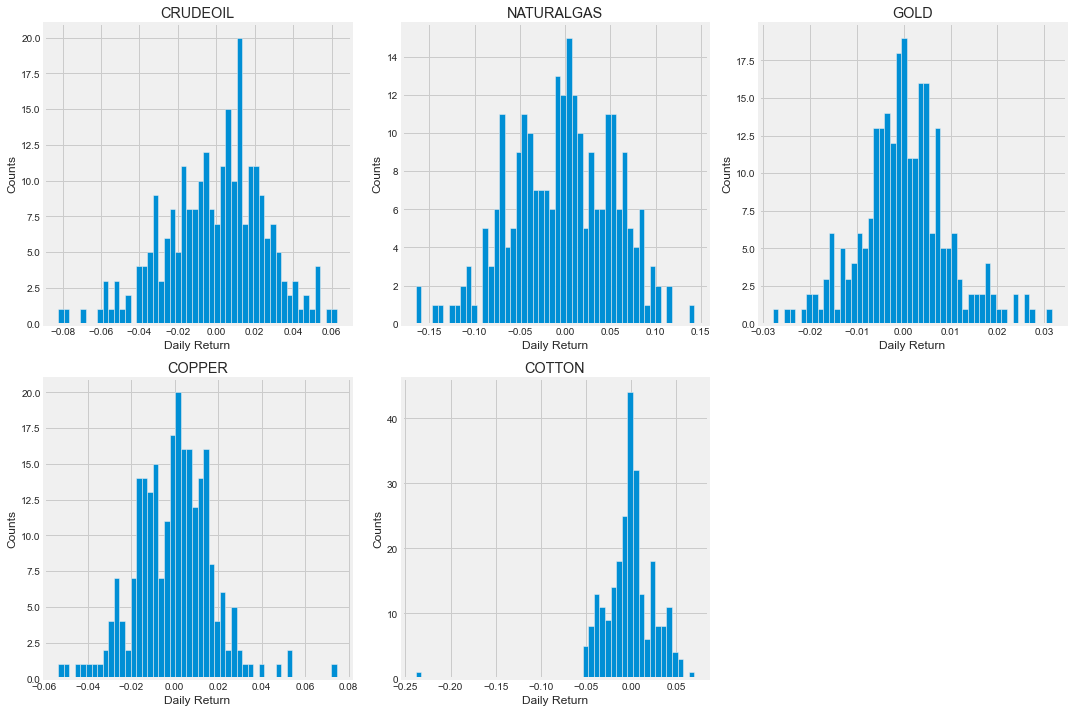

In [9]:
plt.figure(figsize=(15, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. CORRELATION ANALYSIS

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  5 of 5 completed


,CL=F,CT=F,GC=F,HG=F,NG=F
Date,,,,,
2022-04-12 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN
2022-04-13 00:00:00-04:00,0.036282,0.030756,0.004513,0.000638,0.047455
2022-04-14 00:00:00-04:00,0.025899,-0.005533,-0.005098,0.002125,0.043304
2022-04-18 00:00:00-04:00,0.011781,0.019439,0.006089,0.016748,0.071233
2022-04-19 00:00:00-04:00,-0.052213,-0.034959,-0.013717,-0.017098,-0.082353


Now we can compare the daily percentage return of two scripts to check how correlated.

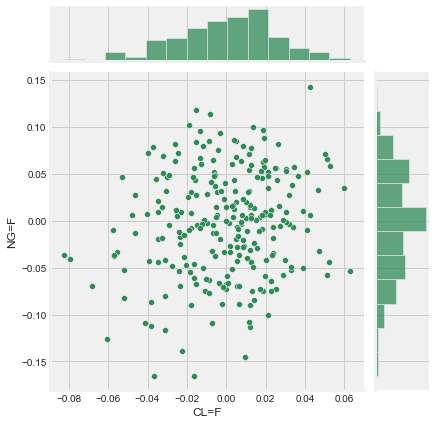

In [11]:
# Comparing NATURAL GAS to itself should show a perfectly linear relationship
sns.jointplot(x='CL=F', y='NG=F', data=tech_rets, kind='scatter', color='seagreen')

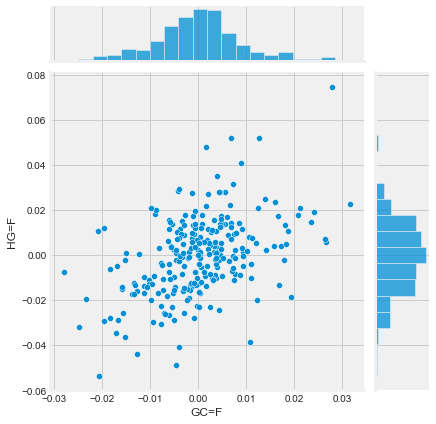

In [12]:
sns.jointplot(x='GC=F', y='HG=F', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination in our ticker list. We can use sns.pairplot() to automatically create this plot

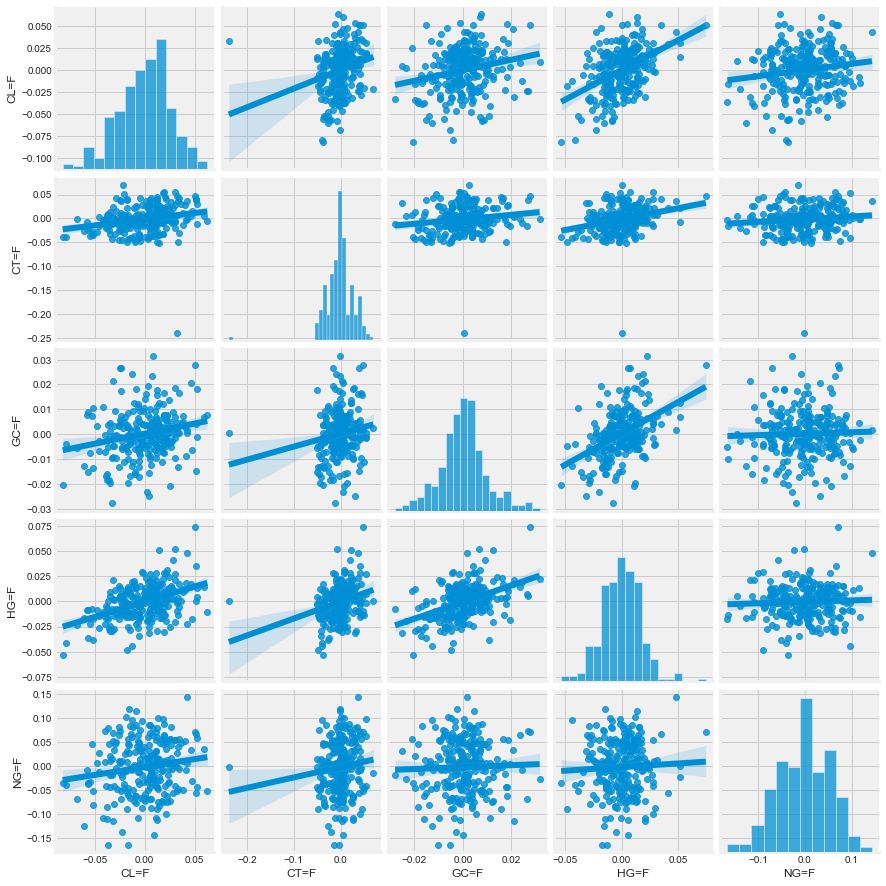

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons
sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the scripts. A quick glance shows an interesting correlation in daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

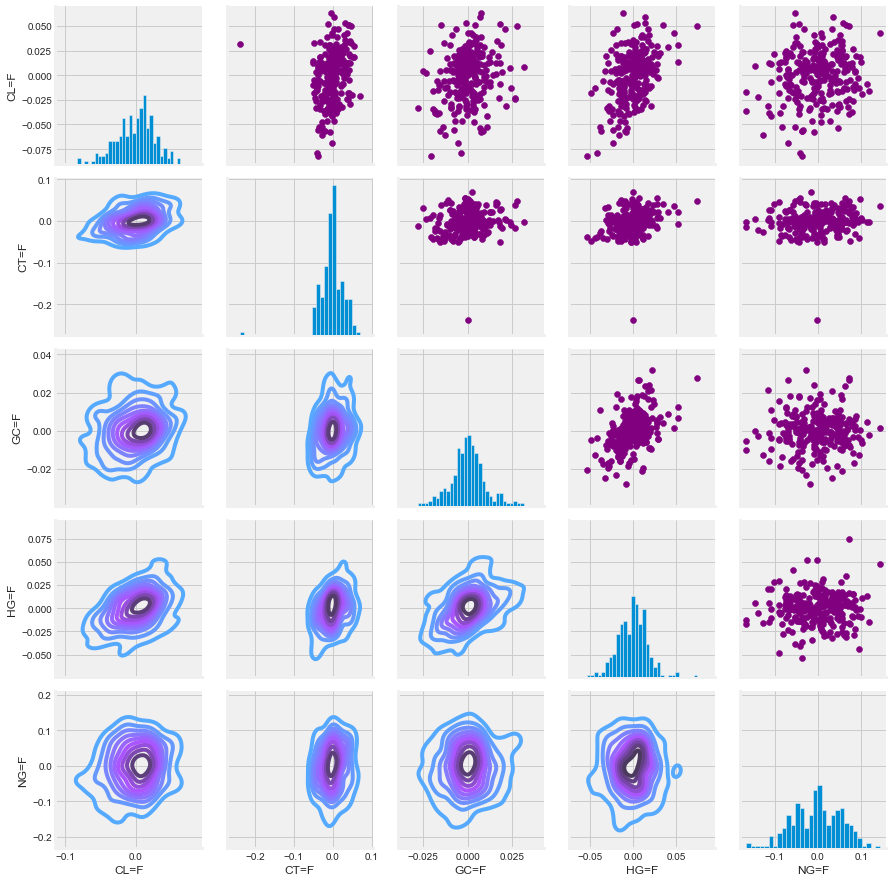

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

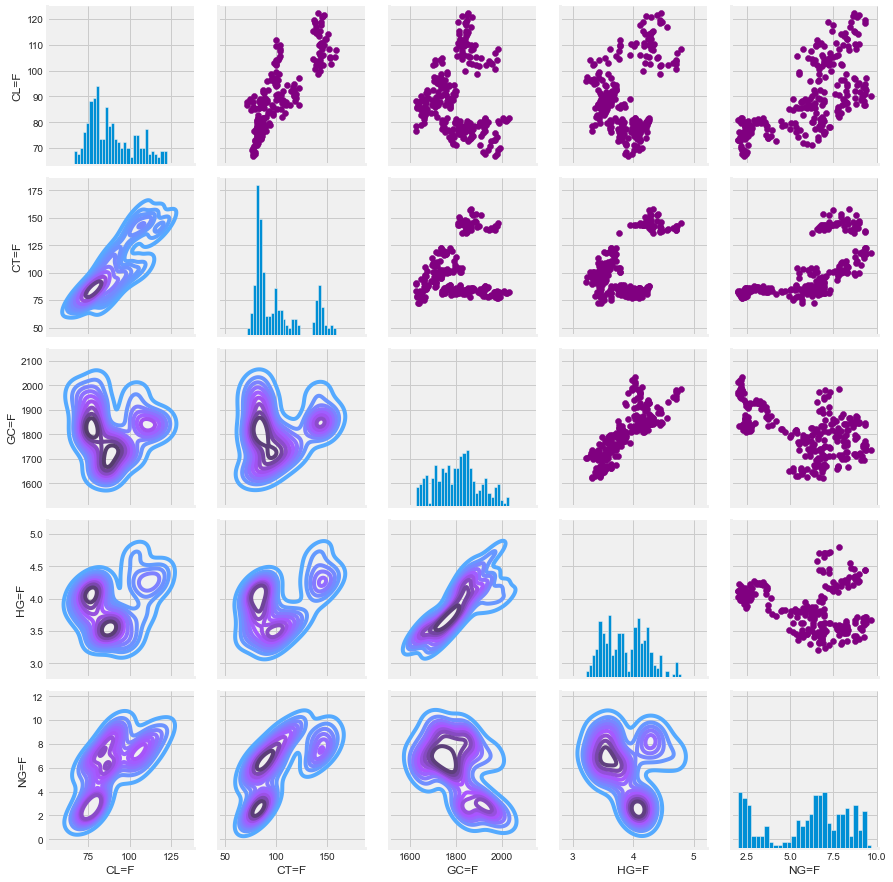

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the scripts' daily return values. By comparing the closing prices, we see an interesting relationship.

Text(0.5, 1.0, 'Correlation of closing price in commodities')

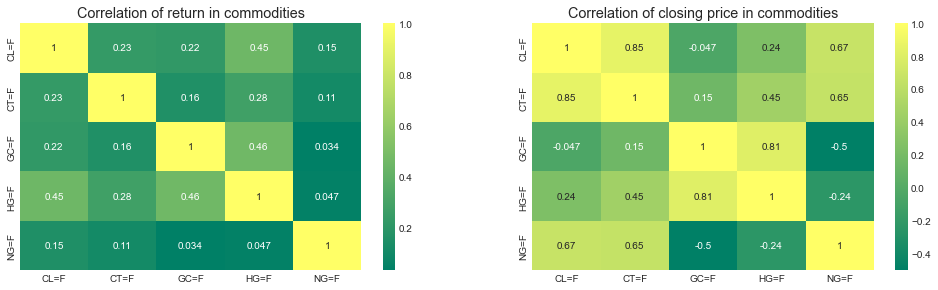

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of return in commodities')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of closing price in commodities')

Just like we suspected in our `PairPlot` we see here numerically and visually the strongest correlation of daily return. It's also interesting to see that all the commodities are positively correlated.

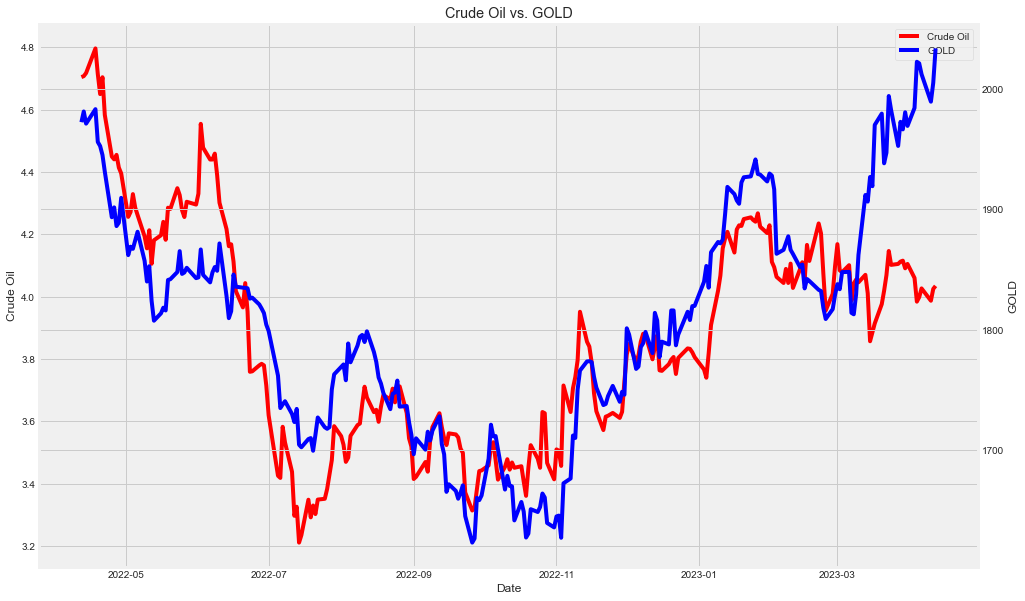

In [17]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax2 = ax1.twinx()
ax1.plot(HG_F["Close"], label="Crude Oil", color='red')
ax1.set_ylabel("Crude Oil")
ax2.plot(GC_F["Close"], label="GOLD", color='blue')
ax2.set_ylabel("GOLD")

ax1.set_title("Crude Oil vs. GOLD")
ax1.set_xlabel("Date")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)
plt.show()

# 5. VALUE AT RISK

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

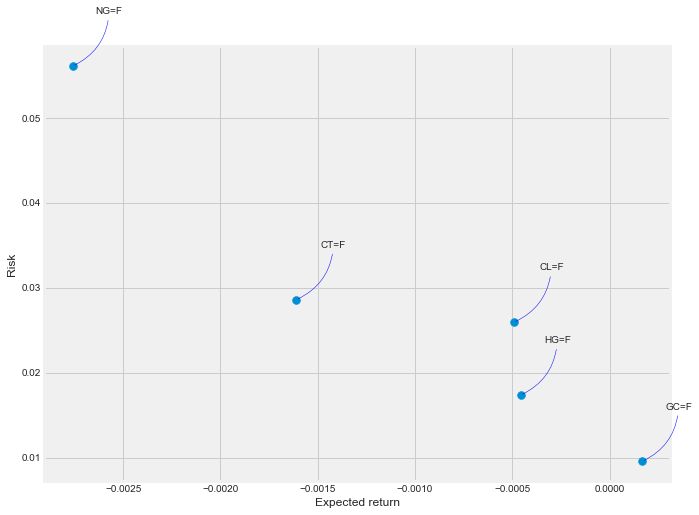

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. FORECASTING USING STATSMODEL & ARCH:

In [19]:
import statsmodels.api as sm
from arch.unitroot import KPSS, ADF

symbol = 'GD=F' # input
start = '2019-01-01' # input 
end = '2023-04-10'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


The S&P GSCI (formerly the Goldman Sachs Commodity Index) serves as a benchmark for investment in the commodity markets and as a measure of commodity performance over time.

https://www.goldmansachs.com/what-we-do/FICC-and-equities/business-groups/sts-folder/gsci/index.html

In [20]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-31 00:00:00-04:00,570.900024,573.450012,568.500000,573.450012,573.450012,25
2023-04-03 00:00:00-04:00,596.750000,596.750000,588.900024,590.200012,590.200012,66
2023-04-04 00:00:00-04:00,591.349976,591.849976,588.000000,588.200012,588.200012,15
2023-04-05 00:00:00-04:00,588.000000,590.250000,588.000000,590.250000,590.250000,2
2023-04-06 00:00:00-04:00,589.250000,589.250000,589.000000,589.250000,589.250000,0


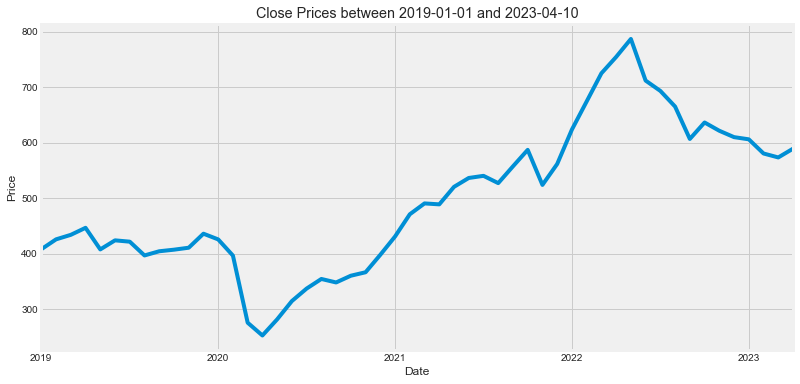

In [21]:
df_month = df.resample('M').last()

plt.figure(figsize = (12, 6))
plt.title('Close Prices between {} and {}'.format(
    start,
    end
))
df_month['Adj Close'].plot()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [22]:
df_month.index.freq

<MonthEnd>

In [23]:
df_month=df_month.rename(columns={"Close": "Price"}, inplace=False)
df_month
df2 = df_month.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'])
df2

,Price
Date,
2019-01-31 00:00:00-05:00,407.799988
2019-02-28 00:00:00-05:00,425.649994
2019-03-31 00:00:00-04:00,433.799988
2019-04-30 00:00:00-04:00,446.450012
2019-05-31 00:00:00-04:00,407.500000
2019-06-30 00:00:00-04:00,423.850006
2019-07-31 00:00:00-04:00,421.450012
2019-08-31 00:00:00-04:00,396.600006
2019-09-30 00:00:00-04:00,404.149994


Dickey–Fuller test: p=0.693409


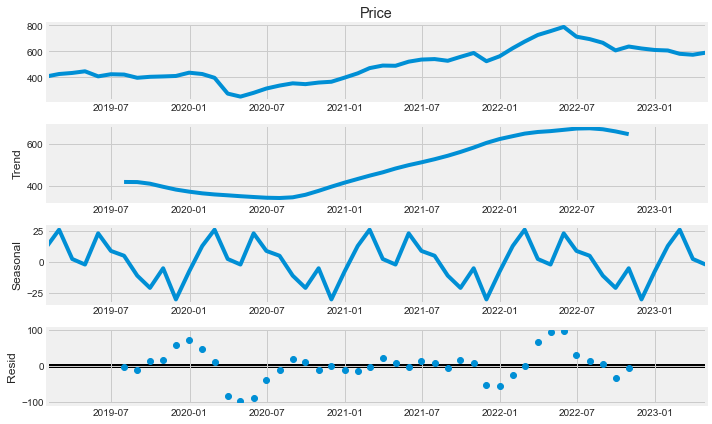

In [24]:
plt.rc("figure", figsize=(10,6))
sm.tsa.seasonal_decompose(df2.Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df2.Price)[1])
plt.show()

In [25]:
ADF(df2.Price)

Test Statistic,-1.153
P-value,0.693
Lags,1


Dickey–Fuller test: p=0.000703


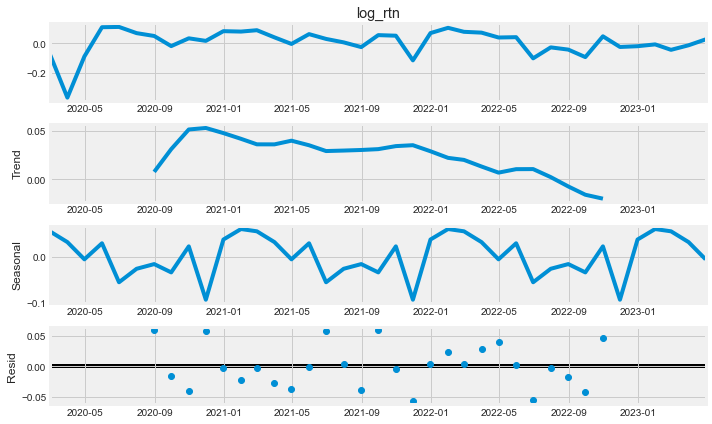

In [26]:
df2['log_rtn'] = np.log(df2.Price/df2.Price.shift(1))
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df2.log_rtn[13:])[1])

# STL-decomposition
sm.tsa.seasonal_decompose(df2.log_rtn[13:]).plot()   

plt.show()

In [27]:
df2=df2.dropna(axis=0)
df2.isnull().sum()

Price      0
log_rtn    0
dtype: int64

In [28]:
df2 = df2.dropna(axis=0)  # Drop rows with missing values
missing_values = df2.isnull().sum()  # Calculate missing values for each column

print(missing_values) 

Price      0
log_rtn    0
dtype: int64


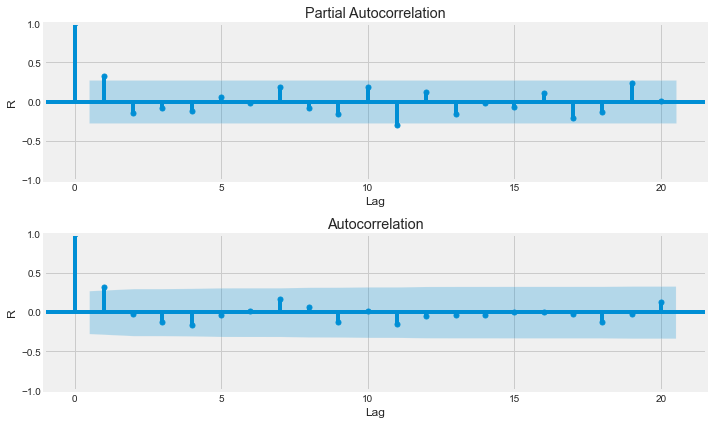

In [29]:
fig, axs = plt.subplots(2)
sm.graphics.tsa.plot_pacf(df2.log_rtn, lags=20, ax=axs[0])
axs[0].set_ylabel('R')
axs[0].set_xlabel('Lag')
sm.graphics.tsa.plot_acf(df2.log_rtn, lags=20, ax=axs[1]);
axs[1].set_ylabel('R')
axs[1].set_xlabel('Lag')
fig.tight_layout()

In [30]:
from itertools import product

Qs = range(0, 3)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df2.Price, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    
    bic = model.bic
    best_bic = bic   
    if bic < best_bic:
        best_model = model
        best_bic = bic
        best_param = param
    results.append([param, model.bic])

In [31]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'bic']
print(result_table.sort_values(by = 'bic', ascending=True).head())
bic_model=sm.tsa.statespace.SARIMAX(df2.Price, order=(1,1,1), 
                                        seasonal_order=(1,1,1, 12)).fit(disp=-1)
print(bic_model.summary())

      parameters         bic
10  (0, 1, 0, 1)  403.453569
28  (1, 0, 0, 1)  403.636934
9   (0, 1, 0, 0)  404.143105
12  (0, 1, 1, 0)  404.837044
1   (0, 0, 0, 1)  405.128385
                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                   51
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -195.795
Date:                            Wed, 12 Apr 2023   AIC                            401.590
Time:                                    10:05:13   BIC                            409.778
Sample:                                02-28-2019   HQIC                           404.503
                                     - 04-30-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

Dickey–Fuller test:: p=0.000000


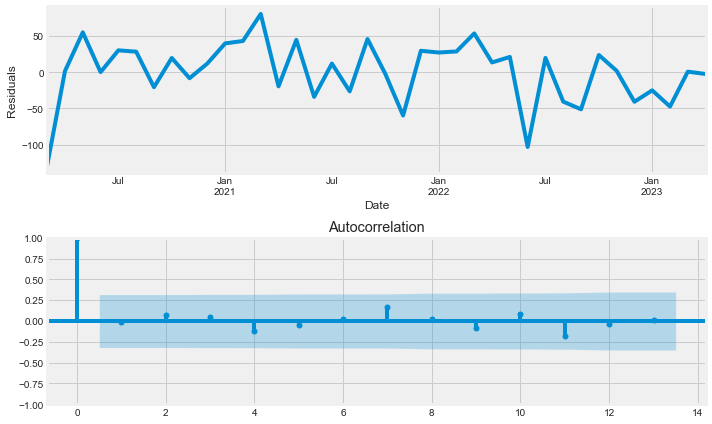

In [32]:
# STL-decomposition
plt.figure(figsize=(10,6))
plt.subplot(211)
bic_model.resid[13:].plot()
plt.ylabel('Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(bic_model.resid[13:].values.squeeze(), lags=13, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(bic_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [33]:
import pytz

# Specify the time zone
tz = pytz.timezone('US/Eastern')

# Create date_list with time zone information
date_list = [datetime(2023, 4, 29, tzinfo=tz),
             datetime(2023, 5, 30, tzinfo=tz), datetime(2023, 6, 30, tzinfo=tz), datetime(2023, 7, 30, tzinfo=tz), datetime(2023, 8, 30, tzinfo=tz),
             datetime(2023, 9, 30, tzinfo=tz), datetime(2023, 10, 30, tzinfo=tz), datetime(2023, 11, 30, tzinfo=tz), datetime(2023, 12, 30, tzinfo=tz),
             datetime(2024, 1, 28, tzinfo=tz), datetime(2024, 2, 28, tzinfo=tz), datetime(2024, 3, 30, tzinfo=tz), datetime(2024, 4, 30, tzinfo=tz),
             datetime(2024, 5, 30, tzinfo=tz), datetime(2024, 6, 30, tzinfo=tz), datetime(2024, 7, 30, tzinfo=tz), datetime(2024, 8, 30, tzinfo=tz)
            ]

future = pd.DataFrame(index=date_list, columns=df2.columns)
df2 = pd.concat([df2, future])
df2['forecast'] = bic_model.predict(start=15, end=144)

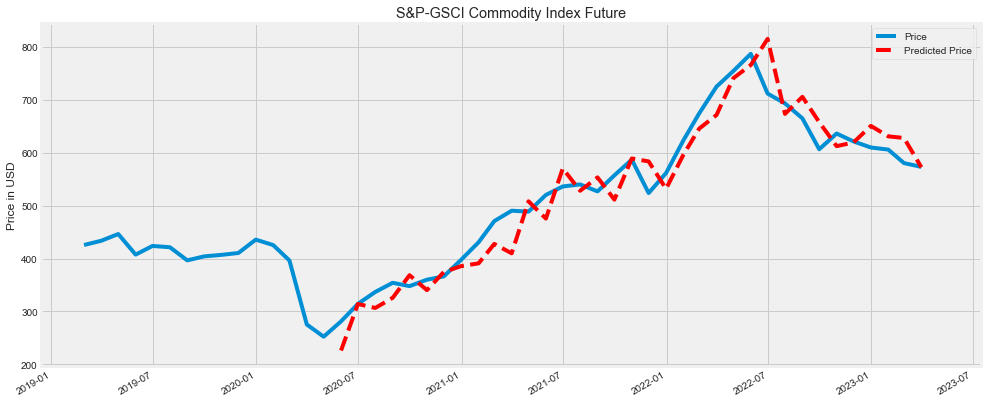

In [34]:
plt.figure(figsize=(15,7))
df2.Price.plot()
df2.forecast.plot(color='r', ls='--', label='Predicted Price')
plt.legend()
plt.title('S&P-GSCI Commodity Index Future')
plt.ylabel('Price in USD')
plt.show()

In [35]:
predictions_int = bic_model.get_forecast(steps=24)
predictions_int.predicted_mean

2023-05-31 00:00:00-04:00    602.809315
2023-06-30 00:00:00-04:00    580.353164
2023-07-31 00:00:00-04:00    575.136107
2023-08-31 00:00:00-04:00    557.493697
2023-09-30 00:00:00-04:00    535.851144
2023-10-31 00:00:00-04:00    557.012384
2023-11-30 00:00:00-05:00    541.649138
2023-12-31 00:00:00-05:00    552.934590
2024-01-31 00:00:00-05:00    564.091325
2024-02-29 00:00:00-05:00    561.232059
2024-03-31 00:00:00-04:00    552.908164
2024-04-30 00:00:00-04:00    562.493509
2024-05-31 00:00:00-04:00    573.734768
2024-06-30 00:00:00-04:00    563.608322
2024-07-31 00:00:00-04:00    561.992581
2024-08-31 00:00:00-04:00    546.908271
2024-09-30 00:00:00-04:00    534.460122
2024-10-31 00:00:00-04:00    553.473335
2024-11-30 00:00:00-05:00    538.010110
2024-12-31 00:00:00-05:00    554.969371
2025-01-31 00:00:00-05:00    569.888777
2025-02-28 00:00:00-05:00    572.680602
2025-03-31 00:00:00-04:00    564.064371
2025-04-30 00:00:00-04:00    572.101933
Freq: M, Name: predicted_mean, dtype: fl

In [36]:
predictions_int.conf_int()

,lower Price,upper Price
2023-05-31 00:00:00-04:00,526.673038,678.945593
2023-06-30 00:00:00-04:00,449.250862,711.455467
2023-07-31 00:00:00-04:00,412.218887,738.053326
2023-08-31 00:00:00-04:00,366.336643,748.650751
2023-09-30 00:00:00-04:00,320.614628,751.087661
2023-10-31 00:00:00-04:00,319.986128,794.038640
2023-11-30 00:00:00-05:00,284.714527,798.583749
2023-12-31 00:00:00-05:00,277.525410,828.343771
2024-01-31 00:00:00-05:00,271.344702,856.837947
2024-02-29 00:00:00-05:00,252.239093,870.225025


In [37]:
conf_df = pd.concat([df2['Price'],predictions_int.predicted_mean, predictions_int.conf_int()], axis = 1)
conf_df.tail()

,Price,predicted_mean,lower Price,upper Price
2024-12-31 00:00:00-05:00,NaN,554.969371,35.338225,1074.600517
2025-01-31 00:00:00-05:00,NaN,569.888777,31.572932,1108.204622
2025-02-28 00:00:00-05:00,NaN,572.680602,16.636947,1128.724257
2025-03-31 00:00:00-04:00,NaN,564.064371,-8.322795,1136.451537
2025-04-30 00:00:00-04:00,NaN,572.101933,-16.175064,1160.378931


In [38]:
conf_df = conf_df.rename(columns={0: 'Predictions', 'lower MI': 'Lower CI', 'upper MI': 'Upper CI'})
conf_df.tail()

,Price,predicted_mean,lower Price,upper Price
2024-12-31 00:00:00-05:00,NaN,554.969371,35.338225,1074.600517
2025-01-31 00:00:00-05:00,NaN,569.888777,31.572932,1108.204622
2025-02-28 00:00:00-05:00,NaN,572.680602,16.636947,1128.724257
2025-03-31 00:00:00-04:00,NaN,564.064371,-8.322795,1136.451537
2025-04-30 00:00:00-04:00,NaN,572.101933,-16.175064,1160.378931


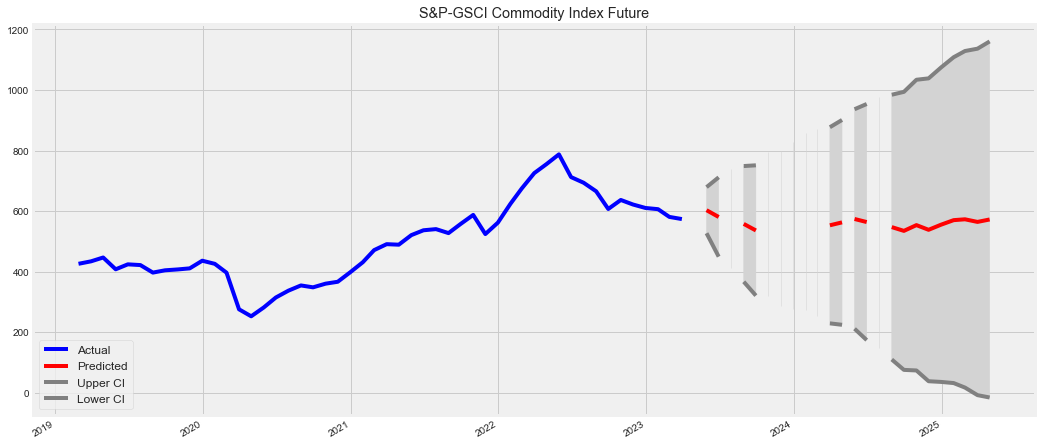

In [39]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(111)


x = conf_df.index.values


upper = conf_df['upper Price']
lower = conf_df['lower Price']

conf_df['Price'].plot(color = 'blue', label = 'Actual')
conf_df['predicted_mean'].plot(color = 'red',label = 'Predicted' )
upper.plot(color = 'grey', label = 'Upper CI')
lower.plot(color = 'grey', label = 'Lower CI')

plt.title('S&P-GSCI Commodity Index Future')
plt.legend(loc = 'lower left', fontsize = 12)
plt.fill_between(x, lower, upper, color='lightgrey')

# Disclaimer

This notebook is entirely informative. None of the content presented in this notebook constitutes a recommendation that any particular security, portfolio of securities, transaction or investment strategy is suitable for any specific person. Futures, stocks and options trading involves substantial risk of loss and is not suitable for every investor. The valuation of futures, stocks and options may fluctuate, and, as a result, clients may lose more than their original investment.

All trading strategies are used at your own risk.

References: 

https://www.investopedia.com/terms/c/correlation.asp 

https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/

Thanks for reading.

Best,
Chrisler.